In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
zillow_df = pd.read_csv('zillow_data.csv')
zillow_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    melted = melted.groupby(['time', 'RegionName']).aggregate({'value':'mean'})
    zipcode_mean_monthly_return = melted.reset_index()

    return zipcode_mean_monthly_return

In [4]:
zillow = melt_data(zillow_df)

In [5]:
years = range(2012, 2019)
year_month_list = [datetime.strptime(f'{year}-01-01', '%Y-%m-%d').date() for year in years]
zillow_foy = zillow.loc[zillow['time'].isin(year_month_list)]

In [6]:
zillow_foy.head()

,time,RegionName,value
2630232,2012-01-01,1001,187200.0
2630233,2012-01-01,1002,294000.0
2630234,2012-01-01,1005,155500.0
2630235,2012-01-01,1007,233100.0
2630236,2012-01-01,1008,184300.0


In [7]:
zillow_foy['returns'] = zillow_foy['value'].div(zillow_foy.groupby('RegionName')['value'].shift(1))

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
zillow_foy = zillow_foy.dropna(subset=['returns'])

In [9]:
def annualised_returns(df):
    annualised_return = {}
    for zipcode in df['RegionName']:
        returns = list(zillow_foy.loc[(zillow_foy['RegionName'] == zipcode)]['returns'])
        
        tot_return = 1
        for r in returns:
            tot_return = tot_return * r 
        
        annualised = (tot_return ** (1/len(returns))) - 1
        annualised_return[zipcode] = annualised 
        
    return annualised_return

In [10]:
zipcode_ann_returns = annualised_returns(zillow_foy)

In [25]:
zipcode_ann_returns_df = pd.DataFrame(list(zipcode_ann_returns.items()),
                                      columns=['RegionName', 'Ann_returns'])

In [26]:
zipcode_ann_returns_df.sort_values('Ann_returns', ascending=False)

,RegionName,Ann_returns
14584,30032,0.281478
14582,27980,0.271736
14565,80216,0.225546
12284,85035,0.225148
14655,94621,0.213049
14642,89030,0.206172
12268,85008,0.204478
13513,94804,0.201469
13494,94601,0.201157
13487,94590,0.200827


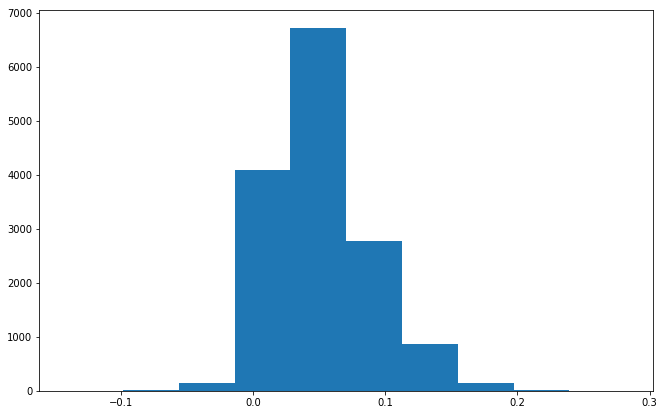

In [27]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(11, 7))
plt.hist(zipcode_ann_returns_df['Ann_returns']);

In [28]:
zipcode_ann_returns_df.to_csv('zipcode_annualised_returns_2012_2018.csv')

In [17]:
over20pct = zipcode_ann_returns_df[zipcode_ann_returns_df['Ann_returns'] >= 0.2]
print(len(over20pct))
over10pct = zipcode_ann_returns_df[zipcode_ann_returns_df['Ann_returns'] >= 0.1]
print(len(over10pct))

10
1547
